In [ ]:
import sys


script_path = "/n/home02/amphillips/p26/scripts" # for cannon
# script_path = "/Users/anyaphillips/Desktop/harvard/research/papers/p26/scripts" # my machine
# sys.path.append("/Users/anyaphillips/Downloads/software/petar_install/include") # for my machine
sys.path.append(script_path)

import petar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.table import Table
from scipy.stats import binned_statistic_2d

# import galpy
# from galpy.potential import MWPotential2014
# from galpy.orbit import Orbit

import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.dynamics import mockstream as ms

from gala.units import galactic

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D


from tqdm import tqdm


# from analyze_petar import analyze_petar
import PETAR_ANALYSIS_FUNCTIONS as paf
import astropy.constants as const
from streamframe import StreamFrame
from scipy.stats import binned_statistic

import matplotlib.pyplot as plt
plt.style.use(script_path+'/vedant.mplstyle')
%config InlineBackend.figure_format='retina'

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import curve_fit
from scipy.stats import binom



import io

/n/home02/amphillips/.conda/envs/petar_env/lib/python3.10/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


# gather information

In [ ]:
paths = paf.define_paths()
simcolm_colors, hm_colors, simcolors = paf.define_simcolors()
time_cmap = paf.define_time_cmap()

init_displacements = paf.define_init_displacements()
apocenters = paf.define_apocenters()

dissolution_times, plotting_times_peri, plotting_times_apo = paf.get_tdis_tplot(paths)

In [ ]:
#### initial half-mass relaxation times
t_rh0 = []
sigv0 = []
t_dyn0 = []
i_list = np.array([0])

npz_path = "/n/holystore01/LABS/conroy_lab/Lab/amphillips/finished_grid/structure_npzs_REAL/"

for n in range(len(paths)):
    rh, nbound, mbound, t_rh, t_dyn, t_dis = paf.compute_cluster_structure( 
        paths[n], i_list, init_displacements[n],
        density_shell_width=0.5 # a .4 pc shell about the half-mass radius is used to compute the density -> crossing time -> relaxation time.
    )
    t_rh0.append(int(t_rh[0]))
    t_dyn0.append(t_dyn[0])

    dat = np.load(npz_path+"%i_structure.npz"%n)
    disp_3d = dat['dispersion_rtid'][0]
    disp_1d = disp_3d/np.sqrt(3)
    sigv0.append(round(disp_1d,2))
        
# print(t_rh0)
# print(sigv0)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


# in-cluster period distributions for 4 illustrative sims

In [5]:
# sim_inds = [
#     [0,2,4,6],
#     [8,10,12,14],
#     [16,18,20,22]
# ]
sim_inds = [
    [8,14],
    [9,15]
]
t_trh_list=np.linspace(0,1,51)
bin_centers, hists, nbounds, = paf.load_in_cluster_period_hists(paths, t_rh0, sim_inds, t_trh_list,
                                                               skipped_n=[0])

column 0
sim 8


100%|██████████| 51/51 [00:06<00:00,  8.02it/s]


sim 14


100%|██████████| 51/51 [00:07<00:00,  6.92it/s]


column 1
sim 9


100%|██████████| 51/51 [00:06<00:00,  7.64it/s]


sim 15


100%|██████████| 51/51 [00:07<00:00,  7.03it/s]


In [6]:
plot_labels_new = [
    "$R_{\\rm{vir},0}=0.75$ pc\nlo-OB","$R_{\\rm{vir},0}=0.75$ pc\nhi-OB",
    "$R_{\\rm{vir},0}=1.5$ pc\nlo-OB","$R_{\\rm{vir},0}=1.5$ pc\nhi-OB",
    "$R_{\\rm{vir},0}=3.0$ pc\nlo-OB","$R_{\\rm{vir},0}=3.0$ pc\nhi-OB",
    "$R_{\\rm{vir},0}=6.0$ pc\nlo-OB","$R_{\\rm{vir},0}=6.0$ pc\nhi-OB",
] * 3

In [7]:
for n, (trho, tdis) in enumerate(zip(t_rh0, dissolution_times)):
    print(n, 2*trho, tdis)

0 132 13388
1 122 12893
2 312 10784
3 296 7298
4 862 13929
5 854 4885
6 2546 7365
7 2100 3065
8 132 10853
9 122 5929
10 312 11381
11 296 4321
12 862 10928
13 854 3354
14 2546 7004
15 2100 2468
16 132 5405
17 122 2399
18 312 5381
19 296 2776
20 862 3956
21 854 1364
22 2546 2341
23 2100 1315


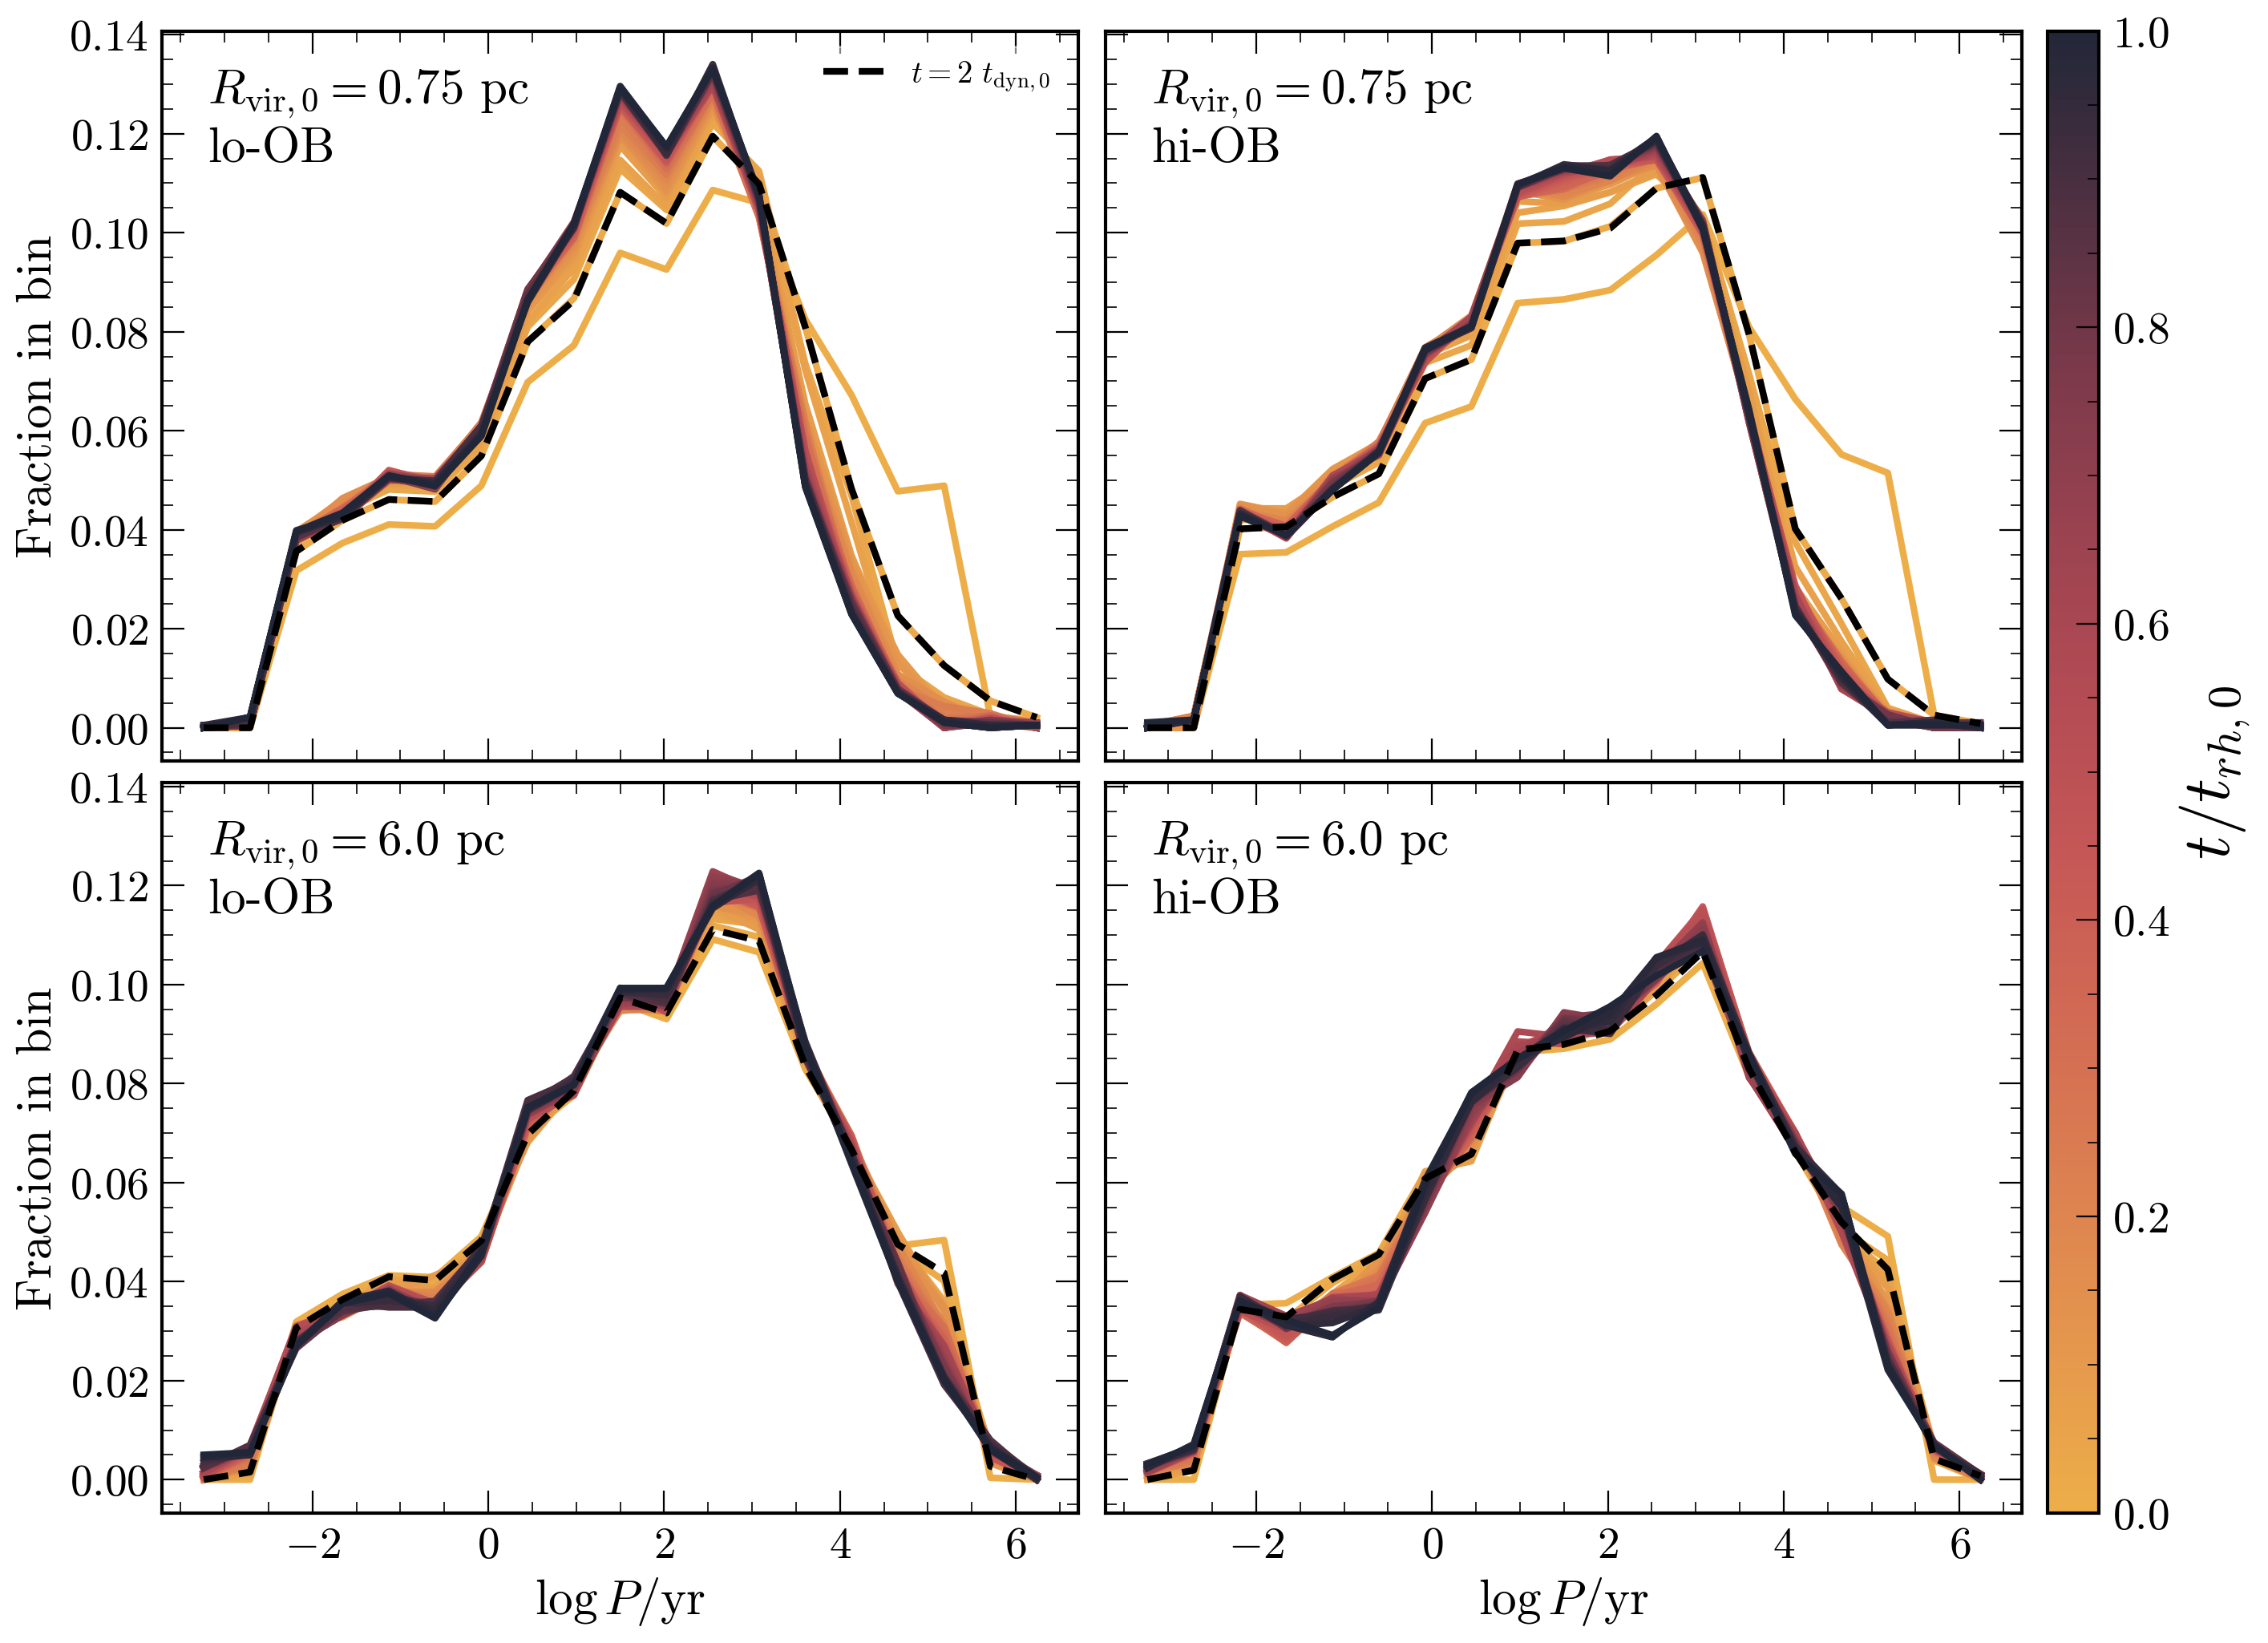

In [9]:
fig, axs_grid = paf.plot_incluster_period_dist(paths, t_rh0, sim_inds, plot_labels_new, bin_centers, hists, nbounds, 
                               t_trh_list, figsize=[16,12],
                               cmap=time_cmap, #custom_cmap,
                               save=False, title='plots/inclust_periodDist_condensed.pdf')
plt.subplots_adjust(wspace=0.03, hspace=0.03)
axs = [axs_grid[0,0],axs_grid[0,1], axs_grid[1,0], axs_grid[1,1]]
ns = [8,9,14,15]


ndyn=2

trh_factors = [5,10,50,100]
trh_colors = ['blue','cornflowerblue','lightblue','lavender']

for j in range(len(ns)):
    n=ns[j]
    ax=axs[j]

    tdyn_plot = ndyn*np.array(t_dyn0)[n]#.astype(int)[n]
    # if tdyn==0:
    #     tdyn+=1    
    tplot = round(tdyn_plot)


    # load binaries at n
    binaries = petar.Binary(member_particle_type=petar.Particle, G=petar.G_MSUN_PC_MYR,
                            interrupt_mode='bse', external_mode='galpy')
    binaries.loadtxt(paths[n]+"data.%i.binary"%tplot, skiprows=1)
    a = binaries.semi * u.pc
    m = binaries.mass * u.Msun
    P = paf.calc_P(a, m)

    rrel, clip = paf.clip_outside_rtid(paths[n], binaries, i=tplot, in_core_frame=True)

    logP_yr = np.log10(P.to(u.yr).value)[clip]

    bins=np.linspace(-3.5, 6.5, 20)
    bin_centers = (bins[:-1]+bins[1:])/2
    y,edges = np.histogram(logP_yr, bins=bins, weights=np.zeros_like(logP_yr)+1/logP_yr.size)
    # ax.plot(bin_centers,y, color='k', linestyle="--", label = r"$t=%i\ t_{\rm{dyn},0}$"%ndyn)
    
    ax.plot(bin_centers,y, color='k', linestyle="--", label = r"$t=%i\ t_{\rm{dyn},0}$"%ndyn if j==0 else None)
    # for jj,trh_factor in enumerate(trh_factors):

    #     tplot = trh_factor*round(t_rh0[n])
    #     # load binaries at n
    #     if tplot<=dissolution_times[n]:
    #         binaries = petar.Binary(member_particle_type=petar.Particle, G=petar.G_MSUN_PC_MYR,
    #                                 interrupt_mode='bse', external_mode='galpy')
    #         binaries.loadtxt(paths[n]+"data.%i.binary"%tplot, skiprows=1)
    #         a = binaries.semi * u.pc
    #         m = binaries.mass * u.Msun
    #         P = paf.calc_P(a, m)

    #         rrel, clip = paf.clip_outside_rtid(paths[n], binaries, i=tplot,in_core_frame=True)

    #         logP_yr = np.log10(P.to(u.yr).value)[clip]

    #         bins=np.linspace(-3.5, 6.5, 20)
    #         bin_centers = (bins[:-1]+bins[1:])/2
    #         y,edges = np.histogram(logP_yr, bins=bins, weights=np.zeros_like(logP_yr)+1/logP_yr.size)
    #         ax.plot(bin_centers,y, color=trh_colors[jj],# linestyle=":",
    #                  linewidth=3, label = r"$t=%i~t_{rh,0}$"%trh_factor if j==0 else None)   

    

# axs_grid[0,1].legend(loc="upper right", fontsize=20)
# plt.savefig("plots/inclust_periodDist_condensed_with%itdyn.pdf"%ndyn, bbox_inches='tight', dpi=300)

axs_grid[0,0].legend(loc='upper right', fontsize=14,framealpha=0.5)
# plt.savefig("plots/inclust_periodDist_posttrh0s.pdf", dpi=300, bbox_inches='tight')